1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Surpress Futurewarnings messages due to seaborn incompatibilities
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
samples = np.random.binomial(n=3, p=0.5, size=10000)
print(samples[:10])

[1 1 1 1 1 1 2 1 2 2]


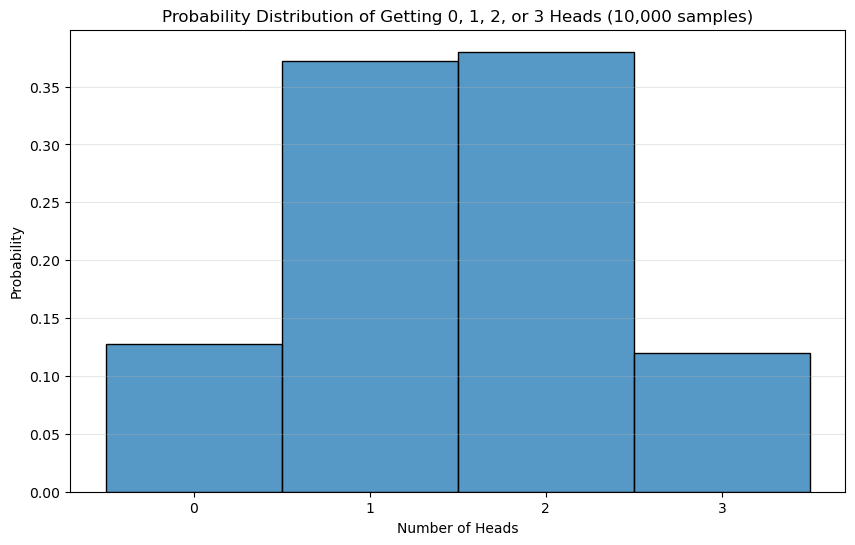

In [3]:
# Plot the probability distribution of the samples
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=np.arange(-0.5, 4.5, 1), kde=False, stat='probability')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of Getting 0, 1, 2, or 3 Heads (10,000 samples)')
plt.xticks([0, 1, 2, 3])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [10]:
# Calculate the empirical expected value (mean) of the distribution
empirical_mean = np.mean(samples)
print(f"Empirical Expected Value (Mean): {empirical_mean}")



Empirical Expected Value (Mean): 1.4926


In [5]:
from math import factorial

# Calculate "n_choose_k" - the number of ways to arrange k heads in n flips
# Divide by total possible outcomes (2^n) to get probability

def coinflip_prob(n, k):
    
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    
    
    return n_choose_k/2**n

In [7]:
P = [coinflip_prob(3, x) for x in range(4)]
P

[0.125, 0.375, 0.375, 0.125]

In [11]:
E = sum([P[x]*x for x in range(4)])
print(f"Theorectical Expected Value: {E}")

Theorectical Expected Value: 1.5


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples


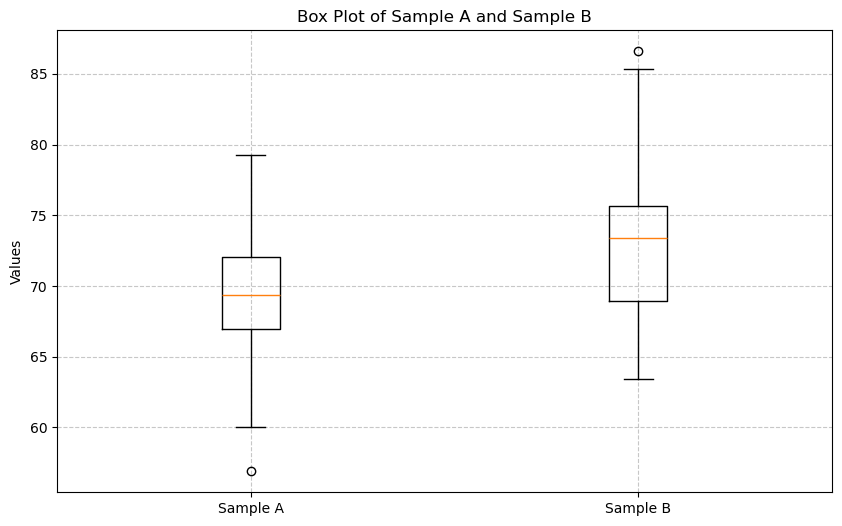

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# 1. Generate Samples
sample_a = np.random.normal(loc=70, scale=5, size=100)
sample_b = np.random.normal(loc=73, scale=5, size=100)

# Plot 1: Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot([sample_a, sample_b], labels=['Sample A', 'Sample B'])
plt.title('Box Plot of Sample A and Sample B')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
#plt.savefig('box_plot_comparison.png')
#plt.close()

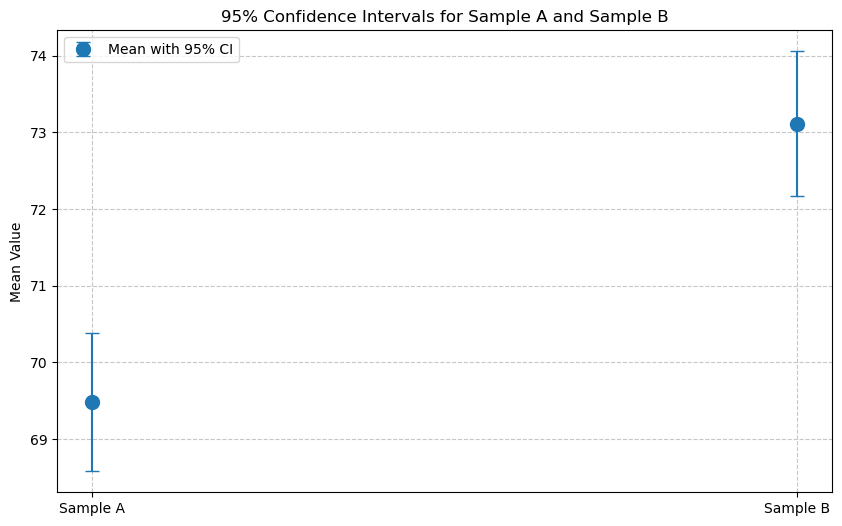

In [14]:
# 2. Independent t-test
t_stat, p_value = stats.ttest_ind(sample_a, sample_b)

# 3. Calculate 95% Confidence Intervals
def calculate_ci(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean, ci

mean_a, ci_a = calculate_ci(sample_a)
mean_b, ci_b = calculate_ci(sample_b)

# Plot 2: Confidence Intervals
plt.figure(figsize=(10, 6))
means = [mean_a, mean_b]
errors = [(ci_a[1] - ci_a[0]) / 2, (ci_b[1] - ci_b[0]) / 2]
plt.errorbar(['Sample A', 'Sample B'], means, yerr=errors, fmt='o', capsize=5, markersize=10, label='Mean with 95% CI')
plt.title('95% Confidence Intervals for Sample A and Sample B')
plt.ylabel('Mean Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
#plt.savefig('confidence_intervals.png')
#plt.close()

In [15]:
# Print results for summary
print(f"Sample A: Mean={mean_a:.2f}, 95% CI=({ci_a[0]:.2f}, {ci_a[1]:.2f})")
print(f"Sample B: Mean={mean_b:.2f}, 95% CI=({ci_b[0]:.2f}, {ci_b[1]:.2f})")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Sample A: Mean=69.48, 95% CI=(68.58, 70.38)
Sample B: Mean=73.11, 95% CI=(72.17, 74.06)
t-statistic: -5.5140
p-value: 0.0000


. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

Analysis for sepal_length vs petal_length:
  Pearson r: 0.8718
  p-value: 1.0387e-47
  R-squared: 0.7600
------------------------------
Analysis for sepal_width vs petal_width:
  Pearson r: -0.3661
  p-value: 4.0732e-06
  R-squared: 0.1340
------------------------------


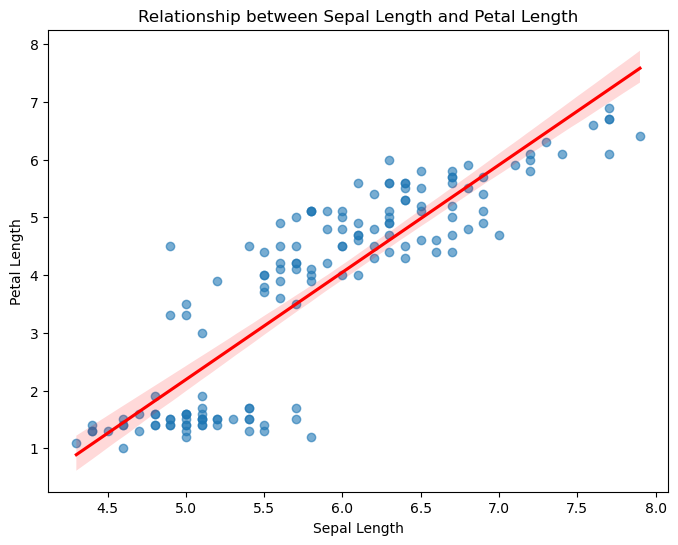

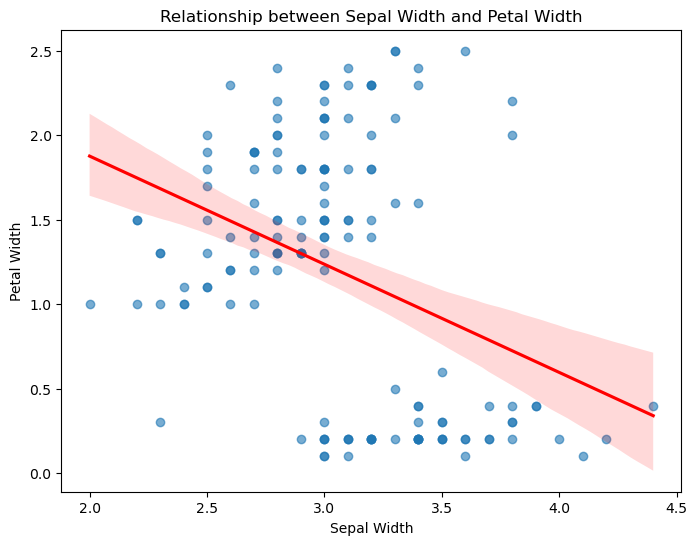

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Load the iris dataset
iris = sns.load_dataset('iris')

# Define the pairs to analyze
pairs = [
    ('sepal_length', 'petal_length'),
    ('sepal_width', 'petal_width')
]

results = []

for i, (x_col, y_col) in enumerate(pairs):
    # Calculate Pearson correlation and p-value
    r, p_value = stats.pearsonr(iris[x_col], iris[y_col])
    r_squared = r**2
    
    results.append({
        'pair': f"{x_col} vs {y_col}",
        'r': r,
        'p_value': p_value,
        'r_squared': r_squared
    })
    
    # Create Scatter Plot
    plt.figure(figsize=(8, 6))
    sns.regplot(data=iris, x=x_col, y=y_col, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Relationship between {x_col.replace("_", " ").title()} and {y_col.replace("_", " ").title()}')
    plt.xlabel(x_col.replace("_", " ").title())
    plt.ylabel(y_col.replace("_", " ").title())
    
    plt.show
    # Save the plot
    #filename = f'correlation_plot_{i+1}.png'
    #plt.savefig(filename)
    #plt.close()

# Display results
for res in results:
    print(f"Analysis for {res['pair']}:")
    print(f"  Pearson r: {res['r']:.4f}")
    print(f"  p-value: {res['p_value']:.4e}")
    print(f"  R-squared: {res['r_squared']:.4f}")
    print("-" * 30)

R-squared of length is 0.76 indicating 76% of the variance in petal length can be explained by the variance in sepal length which is higher than R-sqaured of width (0.134)